# Project in Optimization 1



In [17]:
from functions import *
import numpy as np
import matplotlib.pyplot as plt
# from numpy.random import default_rng
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.datasets import load_iris
from scipy.optimize import approx_fprime

### Creating classes 

Here we create data of random points seperated by a decision boundary at $w=[1,1], b=1$. We use this data to test our solution algorithms and functions. In order to test a larger number of points, simply choose $npoints$ to be the number of points you wish. The plot illustrates the points. Since the number of points assigned to a class is random, keep the same seed to repeat the results from the report.

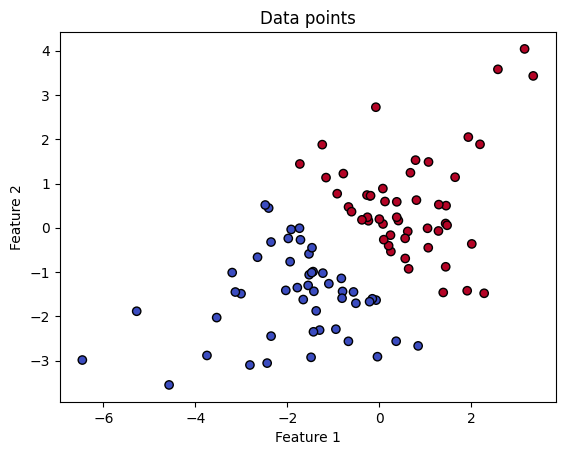

In [18]:
np.random.seed(42)
w = np.array([1.,1.])
b = 1.

npoints = 100
n_A = np.random.randint(0,npoints)
n_B = npoints-n_A
margin = 5.e-1
listA, listB = TestLinear(w,b,n_A,n_B,margin)

x = np.concatenate((np.array(listA),np.array(listB)))

y = np.concatenate((np.ones(n_A), -np.ones(n_B)))

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Data points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()


### Testing the linear classification

Here we test the linear classification, using gradient descent to find the solution. When choosing C too small, the algorithm wont converge, so we havent run it in the final version.

Iteration 0 : 0.10200000000000001
Iteration 500 : 0.011526477692935577
Converged after 854 iterations


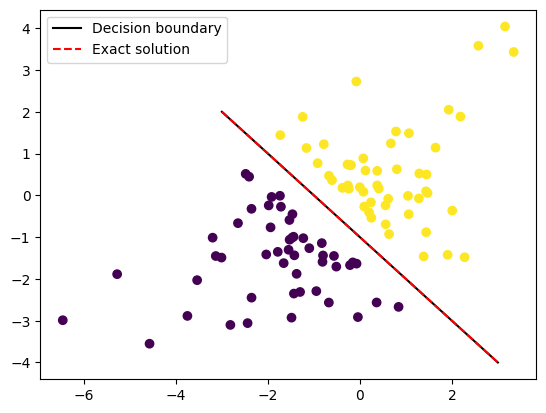

Iteration 0 : 0.10200000000000002
Converged after 361 iterations


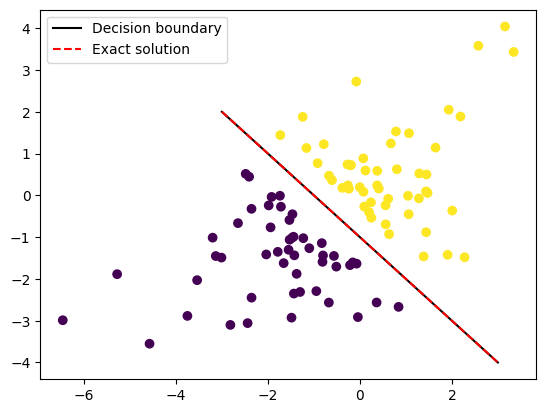

In [19]:

alpha0 = np.zeros(n_A+n_B)
tau = 0.1
niter = 1000
C = 3
G = pairwise_kernels(x, metric = kernal_linear)  

alpha = gradient_descent(alpha0, G, y, tau0=tau, niter=niter, C=C, tol=1e-7, projection=projection)

w, b = w_b(alpha, y,x ,  C=C)
plot_solution(x, y, w, b)


C = 45
G = pairwise_kernels(x, metric = kernal_linear)  

alpha = gradient_descent(alpha0, G, y, tau0=tau, niter=niter, C=C, tol=1e-6, projection=projection)

w, b = w_b(alpha, y,x ,  C=C)
plot_solution(x, y, w, b)

Here we test the gradient descent with a linesearch, which gives the same resulting boundary but with a shorter runtime, as linesearch finds the solution more optimally. 

Iteration 0 : 1.02
Converged after 292 iterations
Converged after 158 iterations


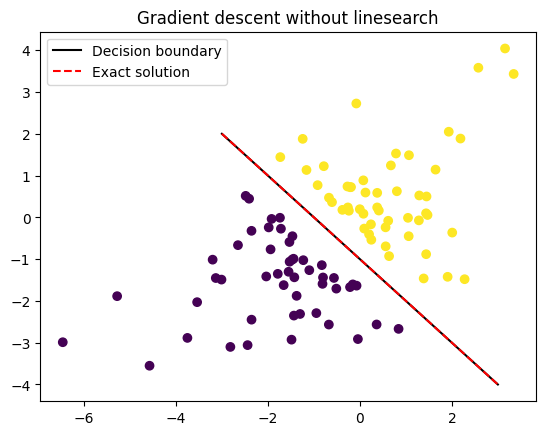

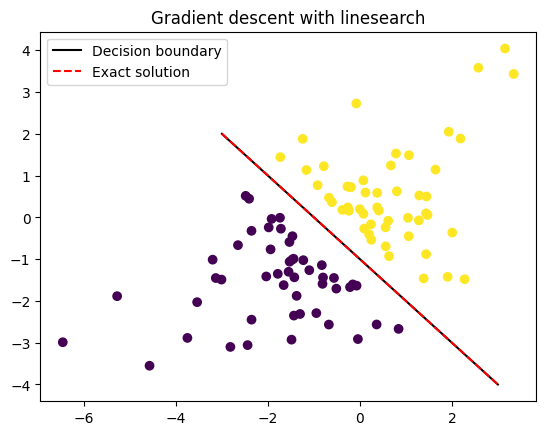

In [20]:



alpha0 = np.zeros(n_A+n_B)
tau = 1
niter = 1000
C = 50
G = pairwise_kernels(x, metric = kernal_linear)


alpha = gradient_descent(alpha0, G, y, tau0=tau, niter=niter, C=C, tol=1e-7, projection=projection)
alphagrad, fks = gradient_descent_linesearch(alpha0, G, y, tau0=tau, niter=niter, C=C, tol=1e-7, project=projection)

w, b = w_b(alpha, y,x ,  C=C)
plt.title("Gradient descent without linesearch")
plot_solution(x, y, w, b)

w, b = w_b(alphagrad, y,x ,  C=C)
plt.title("Gradient descent with linesearch")
plot_solution(x, y, w, b)



Using the plot_db function to visualize the decision boundary, this is a bit overkill, and takes longer to compute, but gives the same result. 

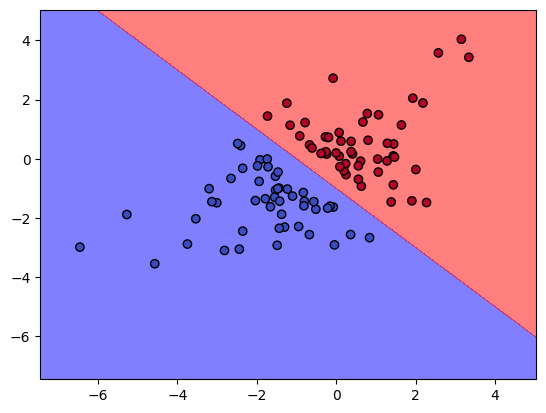

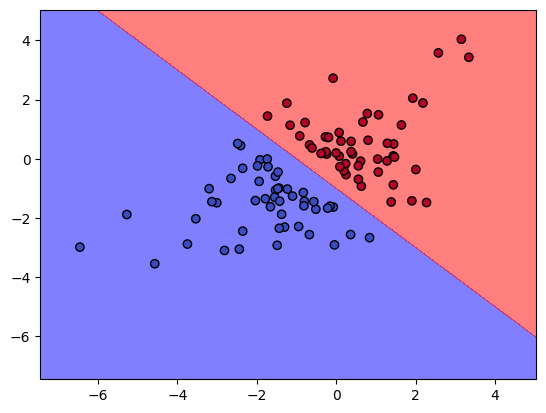

In [21]:
#  
plot_db(x, y, alpha, ker = kernal_linear, C=C)
plot_db(x, y, alphagrad, ker = kernal_linear, C=C)


### Testing the different kernels

Here we plot the different kernels we implemented. It uses the test_kernel function, which computes the w function and plots the resulting decision boundary. 

Converged after 124 iterations


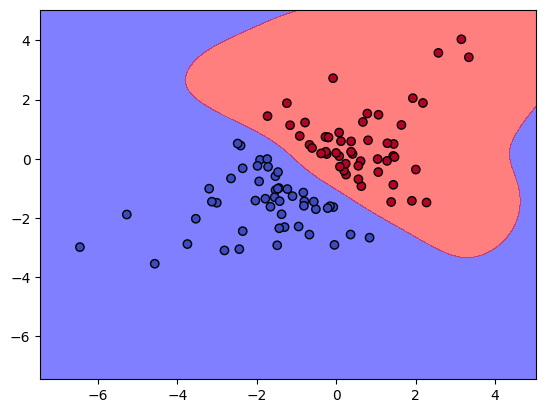

Converged after 136 iterations


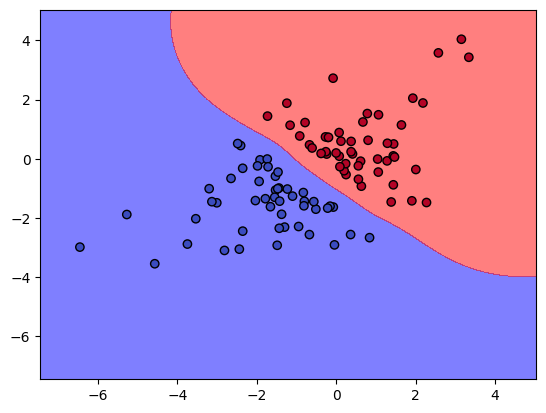

Converged after 84 iterations


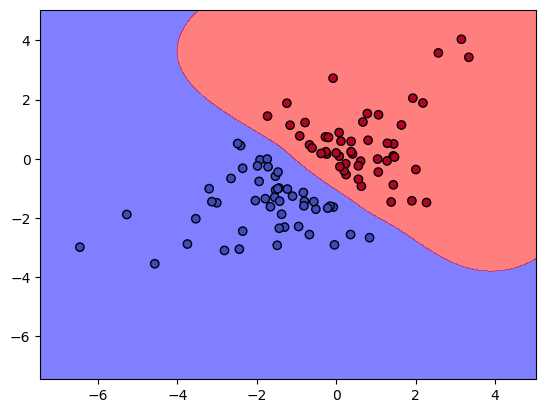

In [6]:

niter = 1000
C = 5
tol = 1e-6

alpha0 = np.zeros(n_A+n_B)
test_kernel(alpha0, x, y, kernal_gaussian, niter=niter, C=C, tau0=tau, tol=tol)
test_kernel(alpha0, x, y, kernal_inv_multiquadratic, niter=niter, C=C, tau0=tau, tol=tol)
test_kernel(alpha0, x, y, kernal_laplacian, niter=niter, C=C, tau0=tau, tol=tol)




### Testing with different intial conditions

To confirm that the initial conditions have little to no effect on the end result we tested how the different kernels get effected by alpha0. The plots didnt get effected, but we observe that the number of iterations to convergence was larger. So the solution becomes the same but the convergence time is longer based on the initial guess, which makes sense.

We didnt explore this any further, but its worth noting so we can justify using $\text{alpha}_0 = (0,0, \dots, 0)$



In [7]:
alpha0s = [
    ("alpha0_random", np.random.rand(n_A + n_B)),
    ("alpha0_random2", np.random.rand(n_A + n_B) * 20),
    ("alpha0_0", np.zeros(n_A + n_B)),
    ("alpha0_1", np.ones(n_A + n_B)),
    
]

kernels= [kernal_linear,kernal_gaussian, kernal_inv_multiquadratic, kernal_laplacian]

for ker in kernels:
    for name, alpha0 in alpha0s:
        print("Kernel: ", ker.__name__, "and Alpha0:" ,name)
        test_kernel(alpha0, x, y, ker, niter=niter, C=C, tau0=tau, tol=tol, plot=False)


Kernel:  kernal_linear and Alpha0: alpha0_random
Converged after 233 iterations
Kernel:  kernal_linear and Alpha0: alpha0_random2
Converged after 213 iterations
Kernel:  kernal_linear and Alpha0: alpha0_0
Converged after 187 iterations
Kernel:  kernal_linear and Alpha0: alpha0_1
Converged after 195 iterations
Kernel:  kernal_gaussian and Alpha0: alpha0_random
Converged after 111 iterations
Kernel:  kernal_gaussian and Alpha0: alpha0_random2
Converged after 127 iterations
Kernel:  kernal_gaussian and Alpha0: alpha0_0
Converged after 124 iterations
Kernel:  kernal_gaussian and Alpha0: alpha0_1
Converged after 140 iterations
Kernel:  kernal_inv_multiquadratic and Alpha0: alpha0_random
Converged after 135 iterations
Kernel:  kernal_inv_multiquadratic and Alpha0: alpha0_random2
Converged after 105 iterations
Kernel:  kernal_inv_multiquadratic and Alpha0: alpha0_0
Converged after 136 iterations
Kernel:  kernal_inv_multiquadratic and Alpha0: alpha0_1
Converged after 111 iterations
Kernel:  ke

### Using gradient descent on the iris dataset

Since fake data isn't a good representation of real data, we have used the method on a subset of the iris dataset. We have only included two features for plotting purposes, and have only tested width and length. We have done this since the project is about the optimization problem, and not about the machine learning aspect of SVM. 

The linear kernel never converges, regardless of what C is, and 

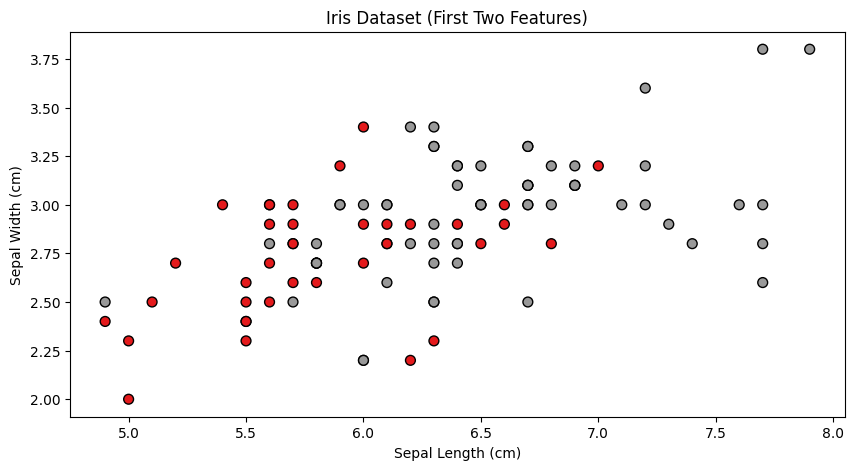

Kernel:  kernal_linear
Did not converge after 5000 iterations


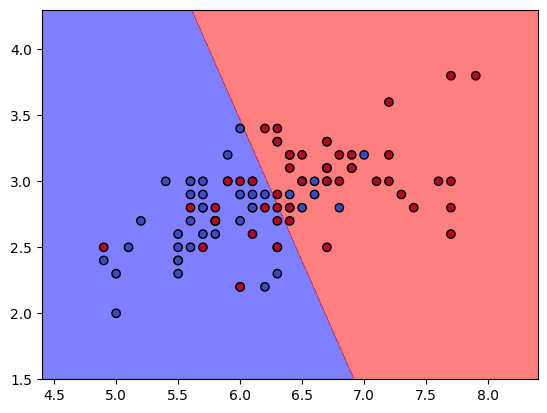

Kernel:  kernal_gaussian
Converged after 1981 iterations


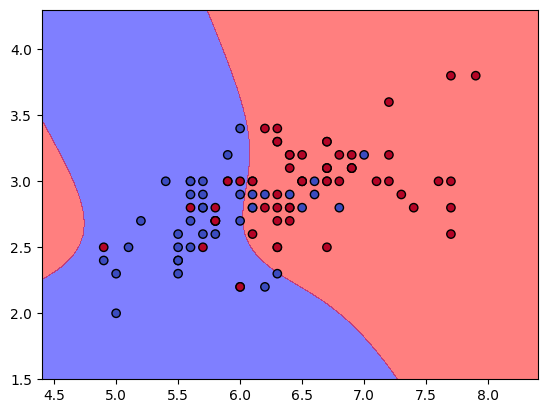

Kernel:  kernal_inv_multiquadratic
Converged after 1805 iterations


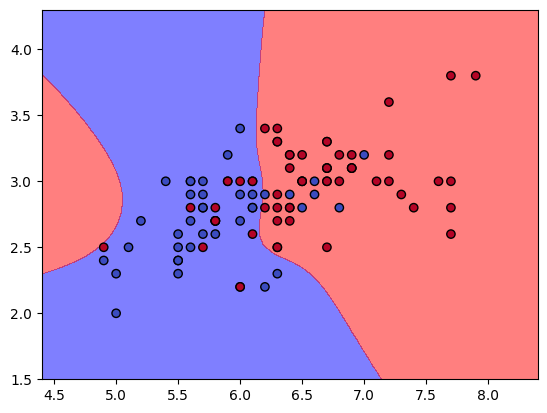

Kernel:  kernal_laplacian
Converged after 243 iterations


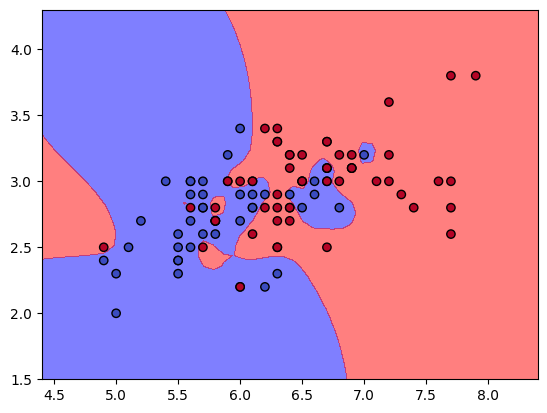

In [16]:

iris = load_iris()
X = iris.data[:, :2][50:150]  # We'll use only the first two features for visualization
Y = iris.target[50:150]  
Y[Y==1] = -1  # Convert to -1 and 1 for the SVM classification to work
Y[Y==2] = 1


plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1, s=50, edgecolors='k')
plt.title('Iris Dataset (First Two Features)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

alpha0 = np.zeros(len(Y))
ker = kernal_gaussian
G = pairwise_kernels(X, metric=ker)
C= 100
xlim = np.array([X[:, 0].min()-0.5, X[:, 0].max()+0.5])
ylim = np.array([X[:, 1].min()-0.5, X[:, 1].max()+0.5])

niter = 5000
tol = 1e-5
for ker in kernels:
    print("Kernel: ", ker.__name__)
    plt.xlim(xlim)
    plt.ylim(ylim)
    test_kernel(alpha0, X, Y, ker, niter=niter, C=C, tau0=tau, tol=tol)



### Bound constrained lagrangian method

Here we have tested out the bound constrained lagrangian method, we sadly have a numerical error that we were not able to fix.

In [9]:
d = len(x[0])
M = len(x)
epsilon = 1e-7

C = 10

startpunkt = np.ones(d+1+2*M)
lambd_0 = np.ones(M)
mu_0 = 10
tol_1 = 1e-7
tol_2 = 1e-7
maxiter = 1000

AL_par = [lambd_0, mu_0, d, M, x, y, C]
gradAL_par = [lambd_0, mu_0, d, M, x, y, C]
constr_par = [x, y]

lower_bound = np.append([- np.inf]*(d+1), [0]*2*M)
upper_bound = [np.inf]*(d+1+2*M)
project_par = [lower_bound, upper_bound]
                                         
linesearch_par = [lambd_0, mu_0, d, M, x, y, C]

BCLM(startpunkt, lambd_0, mu_0, tol_1, tol_2, maxiter, AL, AL_par, constraints, constr_par, grad_AL, gradAL_par, projection_AL, project_par, linesearch_AL, linesearch_par)

iterasjon BCLM 0
Iteration 0 : 3113.3368491124975
Converged after 8 iterations
[-4.94141112e+00 -5.12385601e+00 -6.50878445e+00  1.02538691e+01
  1.03068957e+01  9.82539254e+00  1.25831669e+01  8.79764409e+00
  1.96005409e+01  6.65218485e+00  6.00072899e+00  1.04609059e+01
  1.50310871e+01  1.30583027e+01  1.07111699e+01  7.44298060e+00
  6.82733681e+00  2.00717495e+01  1.03668866e+01  7.58462347e+00
  9.51951110e+00  1.81854281e+01  5.34304929e+01  1.09204237e+01
  6.74658492e+00  2.42974630e+01  1.13042333e+01  1.63347050e+01
  1.72672262e+01  2.58256509e+01  2.23235681e+01  9.96706814e+00
  7.54430505e+00  4.89786675e+01  6.44830814e+00  1.37650883e+01
  1.29388648e+01  7.76096658e+00  1.72236243e+01  6.14607794e+00
  7.03973312e+00  5.69372519e+00  5.96137113e+00  6.60151164e+00
  9.15044317e+00  1.91089264e+01  6.26785358e+00  7.09122261e+00
  3.47207409e+01  6.72394016e+00  5.62302504e+01  1.07043190e+01
  2.40491560e+01  3.40148366e+01  7.57419749e+00  3.40979693e+01
  1.5740773

c:\Users\einri\Documents\Optimering-1\functions.py:740: RuntimeWarning: overflow encountered in scalar add
  AL = AL + C*xi[i] - lambd[i]*(y[i]*(indreprod + b) + xi[i] - s[i] - 1) + 0.5*mu*(y[i]*(indreprod + b) + xi[i] - s[i] - 1)**2
c:\Users\einri\Documents\Optimering-1\functions.py:740: RuntimeWarning: overflow encountered in scalar power
  AL = AL + C*xi[i] - lambd[i]*(y[i]*(indreprod + b) + xi[i] - s[i] - 1) + 0.5*mu*(y[i]*(indreprod + b) + xi[i] - s[i] - 1)**2
c:\Users\einri\Documents\Optimering-1\functions.py:740: RuntimeWarning: overflow encountered in scalar multiply
  AL = AL + C*xi[i] - lambd[i]*(y[i]*(indreprod + b) + xi[i] - s[i] - 1) + 0.5*mu*(y[i]*(indreprod + b) + xi[i] - s[i] - 1)**2
c:\Users\einri\Documents\Optimering-1\functions.py:641: RuntimeWarning: invalid value encountered in scalar divide
  tau = np.dot((vec_k1 - vec_k), (vec_k1 - vec_k)) / nevner


Iteration 500 : nan
Did not converge after 1000 iterations
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan] vecc BCL;
nan ck
else
1.0000000000000001e-49 1.2589254117941663e-05 tols
iterasjon BCLM 6
Iteration 0 : nan
Iteratio

KeyboardInterrupt: 